In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from scipy.stats import skew
import seaborn as sns
import os
from fpdf import FPDF


/Users/psehgal/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#file_path1={'file_name': '/Users/psehgal/Data.csv'}
#file_location = file_path1['file_name'] 
file_name = '/Users/psehgal/atp_test/atp-tour-20002016/Data.csv'

In [3]:
#data = pd.read_csv('/Users/psehgal/dev/airflow_home/kaggleatpdata.csv', dtype='unicode')
data = pd.read_csv(file_name, encoding = 'ISO-8859-1')

/Users/psehgal/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Escude N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46647,54,St. Petersburg,St. Petersburg Open,23/09/2016,ATP250,Indoor,Hard,Quarterfinals,3,Zverev A.,...,NaN,NaN,1.57,2.38,NaN,NaN,1.66,2.45,1.60,2.30
46648,54,St. Petersburg,St. Petersburg Open,23/09/2016,ATP250,Indoor,Hard,Quarterfinals,3,Wawrinka S.,...,NaN,NaN,1.22,4.33,NaN,NaN,1.24,4.91,1.21,4.34
46649,54,St. Petersburg,St. Petersburg Open,24/09/2016,ATP250,Indoor,Hard,Semifinals,3,Zverev A.,...,NaN,NaN,2.38,1.57,NaN,NaN,3.12,1.57,2.68,1.46
46650,54,St. Petersburg,St. Petersburg Open,24/09/2016,ATP250,Indoor,Hard,Semifinals,3,Wawrinka S.,...,NaN,NaN,1.33,3.40,NaN,NaN,1.41,3.80,1.31,3.40


In [5]:
data.Series.unique()

array(['International', 'Grand Slam', 'International Gold', 'Masters',
       'Masters Cup', 'International Series', 'ATP250', 'ATP500',
       'Masters 1000'], dtype=object)

In [6]:
# Best 10 players on clay, grass, and hard surfaces

In [7]:
# df with column names
surface = data[['Surface', 'Winner', 'Loser']]

In [8]:
surface.shape

(46652, 3)

In [9]:
# create 2 df for winner and looser and change the column names to player
surface_w = surface[['Surface', 'Winner']]
surface_l = surface[['Surface', 'Loser']]
surface_w.columns = ['Surface', 'Player']
surface_l.columns = ['Surface', 'Player']

In [10]:
# add 1 more column to the df and fill with sequential nums from 1 to length of df
surface_w['idx'] = range(1, len(surface_w) + 1)
surface_l['idx'] = range(1, len(surface_l) + 1)

In [11]:
# count the num of winning matches for every surface and player combination 
surface_w = surface_w.groupby(['Surface', 'Player']).count()
surface_w = surface_w.reset_index()
surface_w.columns = ['Surface', 'Player', 'Count_Win']


In [12]:
# count the num of lost matches for every surface and player combination
surface_l = surface_l.groupby(['Surface', 'Player']).count()
surface_l = surface_l.reset_index()
surface_l.columns = ['Surface', 'Player', 'Count_Lose']

In [13]:
surface = pd.merge(surface_w, surface_l, on=['Surface', 'Player'])

In [14]:
surface['total_play'] = surface['Count_Win'] + surface['Count_Lose']

In [15]:
surface['perc_win'] = round(surface['Count_Win'] / surface['total_play'],4)*100

In [16]:
surface = surface[surface.total_play > 50]

In [17]:
surface.sort_values(by='perc_win', ascending=False).head(30)

,Surface,Player,Count_Win,Count_Lose,total_play,perc_win
612,Clay,Nadal R.,351,35,386,90.93
969,Grass,Federer R.,147,20,167,88.02
1435,Hard,Djokovic N.,469,82,551,85.12
1468,Hard,Federer R.,622,124,746,83.38
1129,Grass,Murray A.,90,18,108,83.33
944,Grass,Djokovic N.,65,14,79,82.28
351,Clay,Djokovic N.,169,39,208,81.25
1185,Grass,Roddick A.,82,21,103,79.61
1295,Hard,Agassi A.,203,56,259,78.38
1131,Grass,Nadal R.,58,17,75,77.33


In [18]:
surface.Surface.unique()

array(['Carpet', 'Clay', 'Grass', 'Hard'], dtype=object)

In [19]:
# Best players on Clay

top_Clay = surface[surface.Surface == 'Clay'].sort_values(by='perc_win', ascending = False).head(10)
top_Clay.to_csv('top_clay.csv')

Text(0.5, 1, 'Best players on Clay')

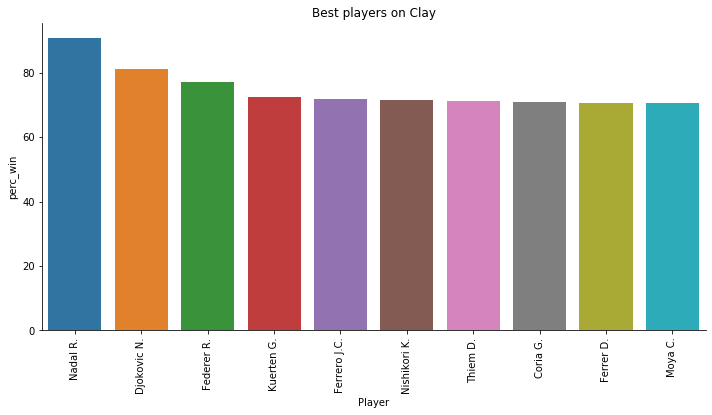

In [20]:
# plot the graph
g=sns.catplot(x='Player', y='perc_win', data=top_Clay, kind='bar', height=5, aspect=2)
g.set_xticklabels(labels = top_Clay.Player,  rotation=90)
plt.title('Best players on Clay')

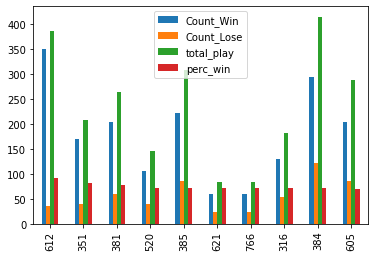

In [21]:
top_Clay.plot(kind='bar')

plt.savefig('topclay.png')


In [22]:
# Best player on Grass

top_Grass = surface[surface.Surface == 'Grass'].sort_values(by='perc_win', ascending = False).head(10)
top_Grass.to_csv('top_grass.csv')

/Users/psehgal/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Best players on Grass')

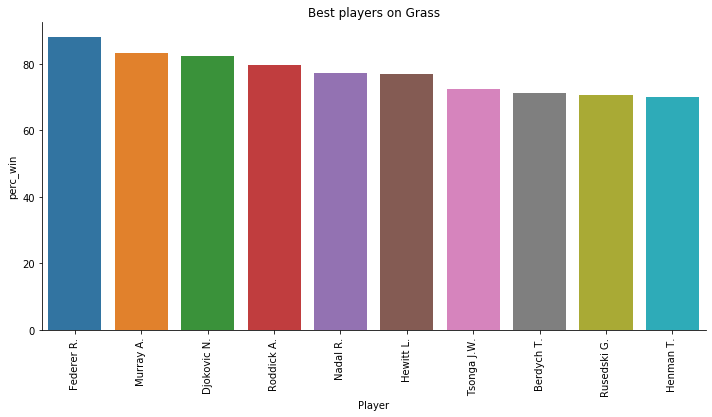

In [23]:
# plot the graph
g=sns.catplot(x='Player', y='perc_win', data=top_Grass, kind='bar', size=5, aspect=2)
g.set_xticklabels(labels = top_Grass.Player,  rotation=90)
plt.title('Best players on Grass')

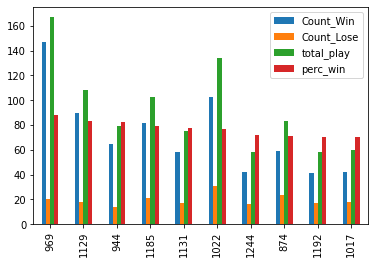

In [24]:
top_Grass.plot(kind='bar')

plt.savefig('topgrass.png')

In [25]:
# Best players on Hard surface

top_Hard = surface[surface.Surface == 'Hard'].sort_values(by='perc_win', ascending = False).head(10)
top_Hard.to_csv('top_hard.csv')

Text(0.5, 1, 'Best players on Hard Surface')

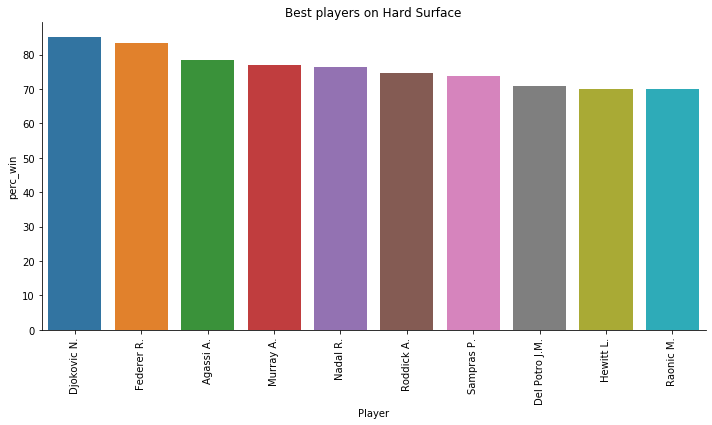

In [26]:
# plot the graph
g=sns.catplot(x='Player', y='perc_win', data=top_Hard, kind='bar', size=5, aspect=2)
g.set_xticklabels(labels = top_Hard.Player,  rotation=90)
plt.title('Best players on Hard Surface')

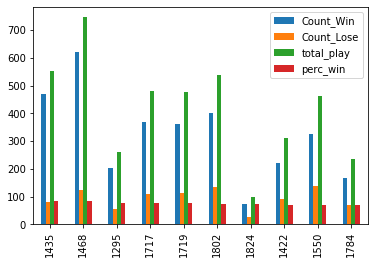

In [27]:
top_Hard.plot(kind='bar')

plt.savefig('tophard.png')

In [28]:
#https://www.blog.pythonlibrary.org/2018/06/05/creating-pdfs-with-pyfpdf-and-python/
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="ATP Mens Tour Report!", ln=1, align="C")

pdf.ln(5) #down 5 lines
pdf.cell(10,15,txt="The following graph shows the top players on clay surface")#, ln=1, align="C")
pdf.ln(10) #down 5 lines
pdf.image('/Users/psehgal/dev/airflow_home/topclay.png')#, x=0, y=8, w=100)

pdf.ln(5)
pdf.cell(10,15,txt="The following graph shows the top players on Grass surface")
pdf.ln(10)
pdf.image('/Users/psehgal/dev/airflow_home/topgrass.png')

pdf.ln(5)
pdf.cell(10,15,txt="The following graph shows the top players on Hard Surface surface")
pdf.ln(10)
pdf.image('/Users/psehgal/dev/airflow_home/tophard.png')

pdf.output("atp_mens_tour_pdf_report.pdf")


''

In [29]:
from IPython.display import IFrame,display
filepath="atp_pbi_dash_board.pdf"
IFrame(filepath,width=700,height=400)